In [1]:
import pandas as pd

df_train = pd.read_csv('./mnist_train.csv')
df_test = pd.read_csv('./mnist_test.csv')

In [2]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [4]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import numpy as np
np.sqrt(784)

28.0

In [4]:
X_train = np.array(df_train.iloc[:,1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

In [5]:
import random

samples = random.choices(population=range(0,60000), k=16)
samples

[14690,
 3308,
 12953,
 56256,
 7728,
 11649,
 42268,
 33892,
 34320,
 5120,
 7466,
 38335,
 8318,
 3191,
 43398,
 41447]

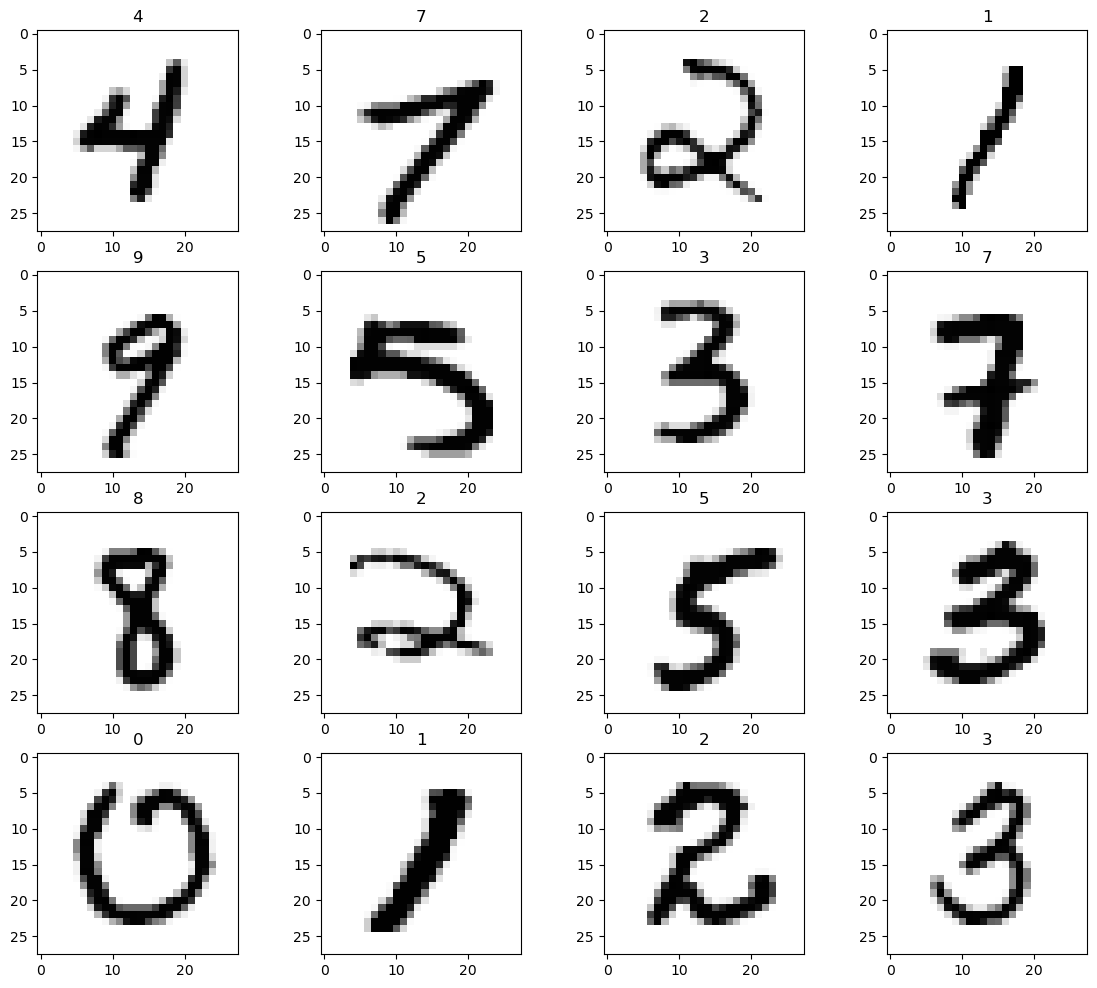

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys')
    plt.title(y_train[n])

plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9688

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf',KNeighborsClassifier())
])

param = {
    'pca__n_components' : [2,5,10],
    'clf__n_neighbors' : [5,10,15]
}

In [15]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
grid = GridSearchCV(pipe, param, cv=kf, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [16]:
grid.best_score_

0.9294833333333334

In [17]:
grid.best_params_

{'clf__n_neighbors': 10, 'pca__n_components': 10}

In [18]:
pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9287

In [19]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



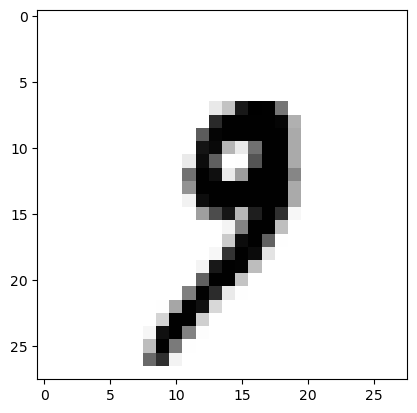

Ans :  [9]
Real :  9


In [23]:
import matplotlib.pyplot as plt
n = 1000
plt.imshow(X_test[n].reshape(28,28), cmap='Greys')
plt.show()

print('Ans : ', grid.best_estimator_.predict(X_test[n].reshape(1,784)))
print('Real : ', y_test[n])

In [24]:
preds = grid.best_estimator_.predict(X_test)
preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
wrong_results = X_test[y_test != preds]
samples = random.choices(population=range(0,wrong_results.shape[0]), k=16)

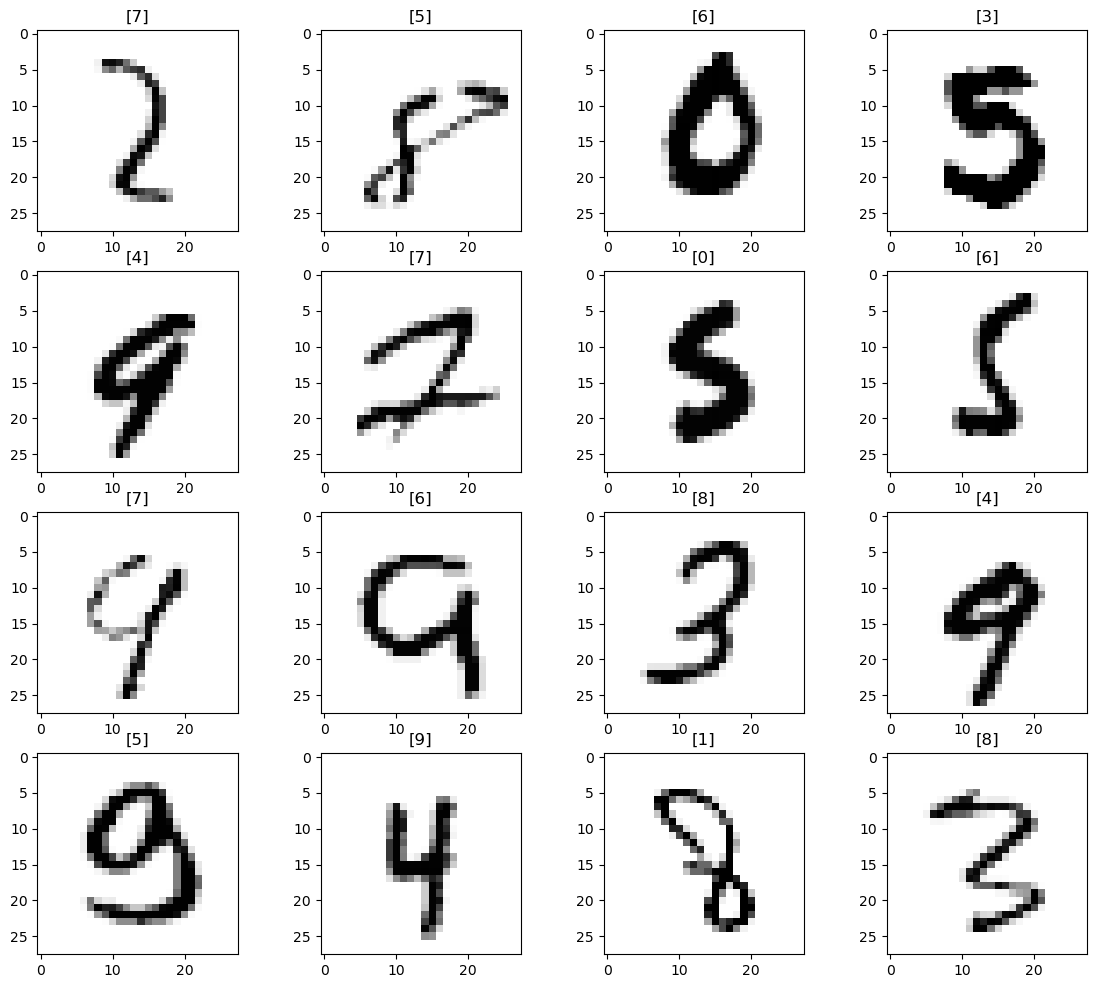

In [29]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap='Greys')
    pred_digit = grid.best_estimator_.predict(wrong_results[n].reshape(1,784))
    plt.title(str(pred_digit))

plt.show()